![tile](./cover.png)
# Misión
En esta práctica vamos a aplicar calcular las curvas de dispersión para un conjunto de datos sintéticos correspondientes a un perfíl sísmico de ondas superficiales (**MASW**). 
# Introducción
El método de análisis de ondas superficiales multicanal (**Multichannel Analysis of Surface Wave**) es una técnica de exploración geofísica ampliamente utilizada en la industria para determinar el tipo de suelo. El cual consiste en analizar los espectros en frecuencia de los datos colectados en campo. A partir de los cuales se puede calcular las curvas de dispersión. <br>

# Calculo de las curvas de dispersión
Para llevar acabo el cálculo de las curvas de dispersión es necesario calcular el espectro de cada uno de los canales utilizandola **Transformada de Fourier**. 

$$
\begin{equation}
\mathscr{F}\left\{f(t)\right\}=F(\omega)=\int^\infty_\infty f(t)e^{j\omega t}dt.
\end{equation}
$$

Donde $f(t)$ son las señales registradas por los geófonos, $F(\omega)$ es la representación en frecuencia y $\omega$ es la frecuencia angular. Una propiedad que es importante para la determinación de las curvas de dispersión es la propiedad de corrimiento que se define de la siguiente manera, 

$$
\begin{equation}
f(t-to)\overset{\mathscr{F}}{\longrightarrow}e^{-i\omega t_0}F(\omega)
\end{equation}
$$
En este caso vamos a considerar un conjunto de valores de velocidades de fase, mediante el cual se va a construir un plano 3 dimensional cuyos ejes son: la frecuencia, $f$, la velocidad de fase $c(f)$ y la potencia de la señal apilada para un determinado número de señales de entrada. 
# Ejemplo
Vamos a considerar un perfíl sísmico (**MASW**) para un arreglo de 24 geofonos de $4.5Hz$, con un metro de separación entre geofonos. Como fuente se utilizó un martillo de $14\,lb$ ubicado a $10\,m$ del primer geofono (forward). El espaciamiento entre geofonos es de $1\,m$.
## Importar librerias

In [1]:
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import masw
from scipy.optimize import dual_annealing
importlib.reload(masw)
%matplotlib notebook

## Lectura de Datos

<IPython.core.display.Javascript object>


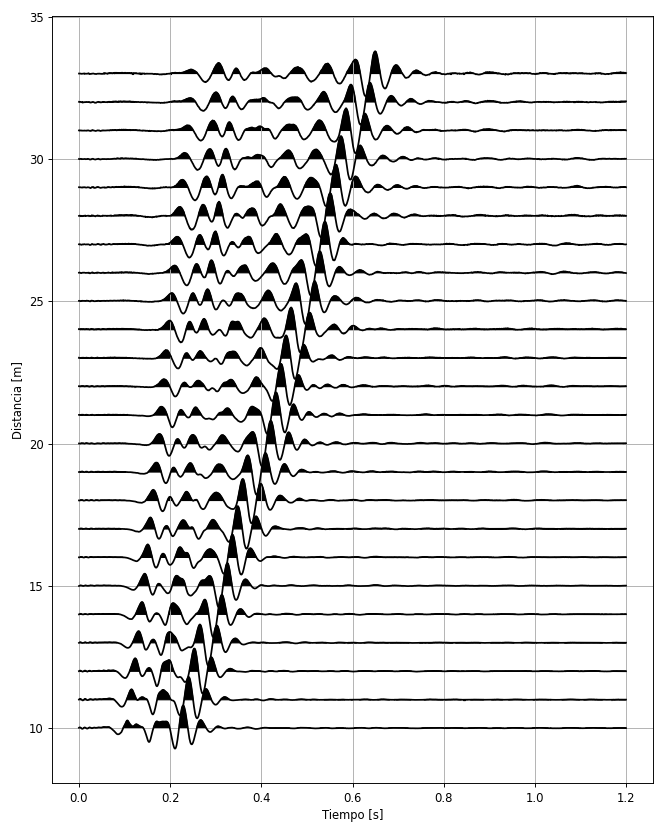

(<Figure size 800x1000 with 1 Axes>,
 <AxesSubplot:xlabel='Tiempo [s]', ylabel='Distancia [m]'>)

In [2]:
filename    = 'SampleData.dat'
HeaderLines = 7
fs          = 1000 # Hz
N           = 24
x1          = 10   # m
dx          = 1    # m
direction   = 'forward';
Amasw       = masw.masw(filename, 1/fs, fs, N, dx, x1, direction, header=6 )
A           = pd.read_csv(filename, header=6, delimiter="\t", skip_blank_lines=False)
A.head(10)
offset  = 0

dir(Amasw)
Amasw.plot(scale=.8)

# Análisis de Dispersión

<IPython.core.display.Javascript object>


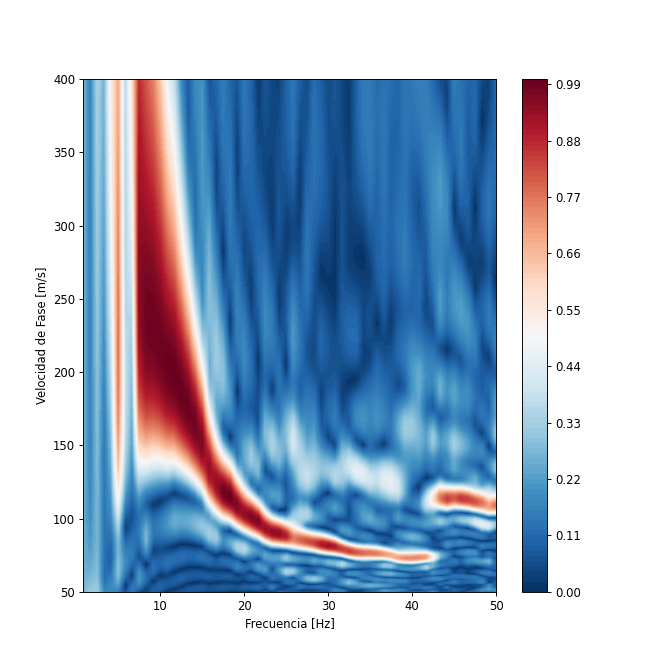

<IPython.core.display.Javascript object>


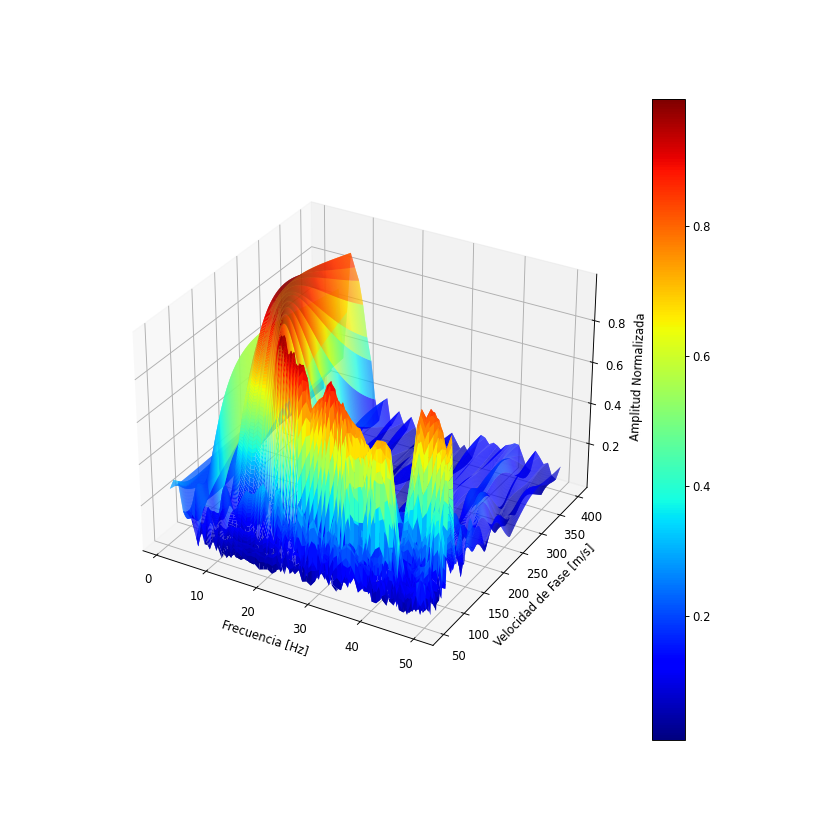

<IPython.core.display.Javascript object>


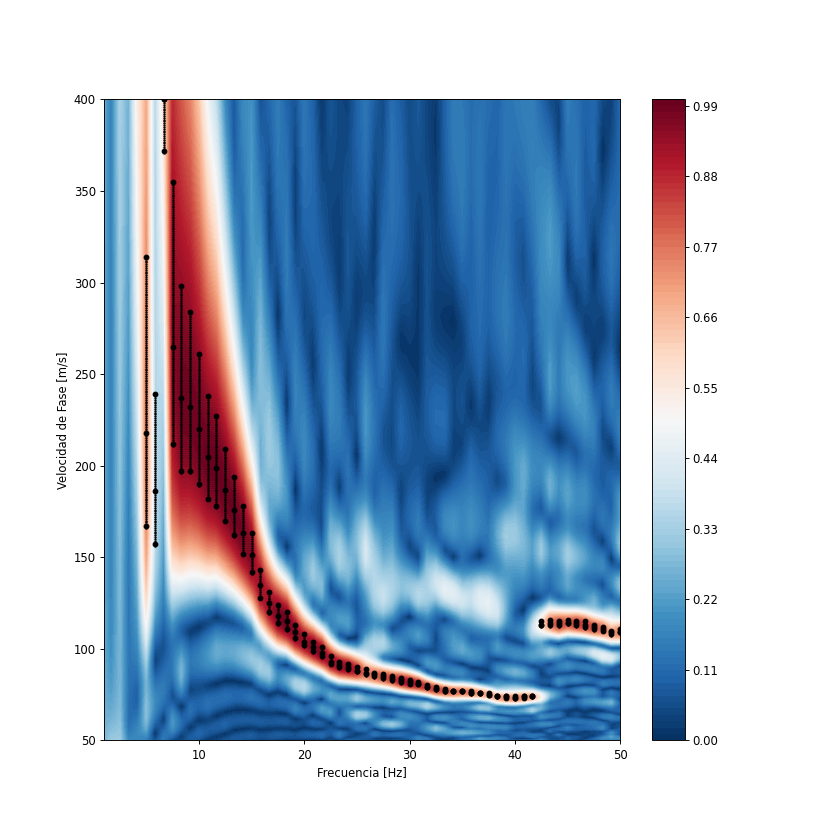

Inicio de curva de dispersión del modo funamental: 5
Fin de curva de dispersión del modo funamental: 44


<IPython.core.display.Javascript object>


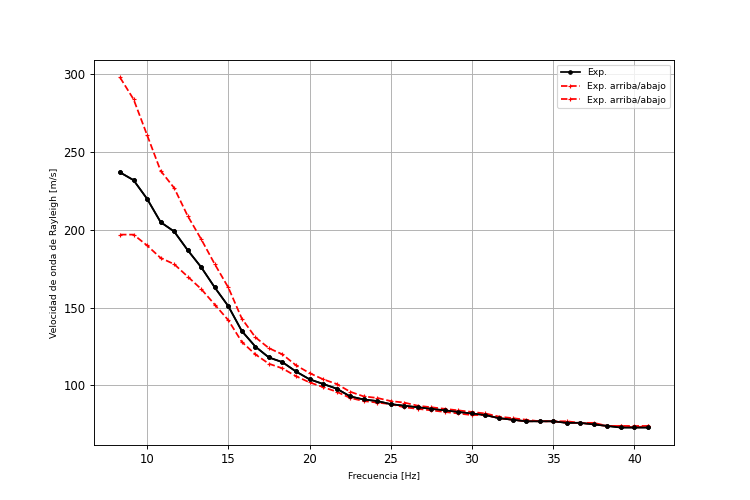

<IPython.core.display.Javascript object>


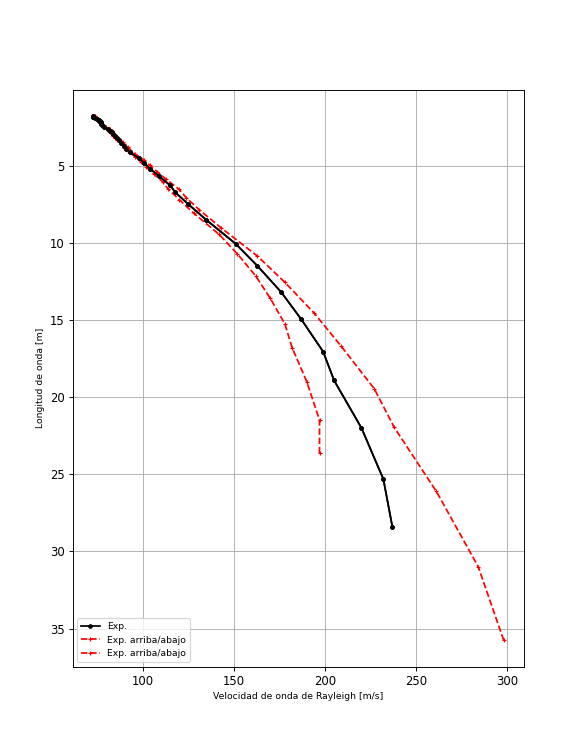

In [3]:
cT_min   = 50   # m/s
cT_max   = 400  # m/s
delta_cT = 1    # m/s
Amasw.dispersion_imaging(cT_min, cT_max, delta_cT)

resolution = 100   # No. de niveles
fmin = 0           # Hz
fmax = 50          # Hz
Amasw.plot_dispersion_image_2D(fmin, fmax, resolution)

fmin = 0 #m/s
fmax = 50 #m/s
fig3D, ax3D = Amasw.plot_dispersion_image_3D(fmin, fmax)

f_receivers     = 4.5 # Frecuencia de los geófonos
select          = 'numbers'
up_low_boundary = 'yes'
p               = 95  # Porcentaje
c_curve0 = Amasw.extract_dispersion_curve(f_receivers, select, up_low_boundary, p)

FigWidth = 9 #cm
FigHeight = 6 #cm
FigFontSize = 8 #pt
type = 'f_c'
up_low_boundary = 'yes'
Amasw.plot_dispersion_curve(type, up_low_boundary, FigWidth, FigHeight, FigFontSize)

FigWidth = 7 #cm
FigHeight = 9 #cm
FigFontSize = 8 #pt
type = 'c_lambda'
up_low_boundary = 'yes'
Amasw.plot_dispersion_curve(type, up_low_boundary, FigWidth, FigHeight, FigFontSize)

# Análisis de Inversión

<IPython.core.display.Javascript object>


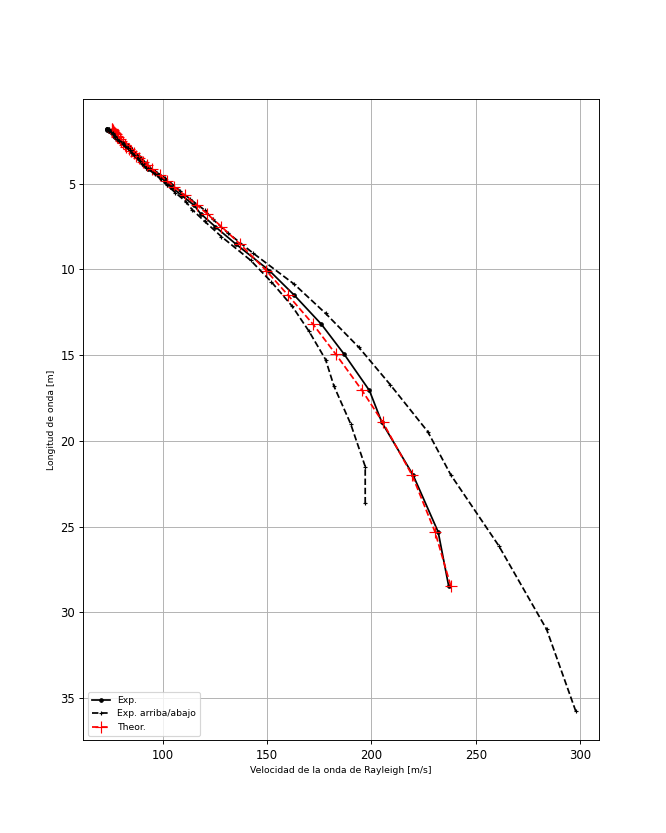

Error inicial: 1.8268825906445112
Error final: <function objetivo at 0x000001C834753CA0>


<IPython.core.display.Javascript object>


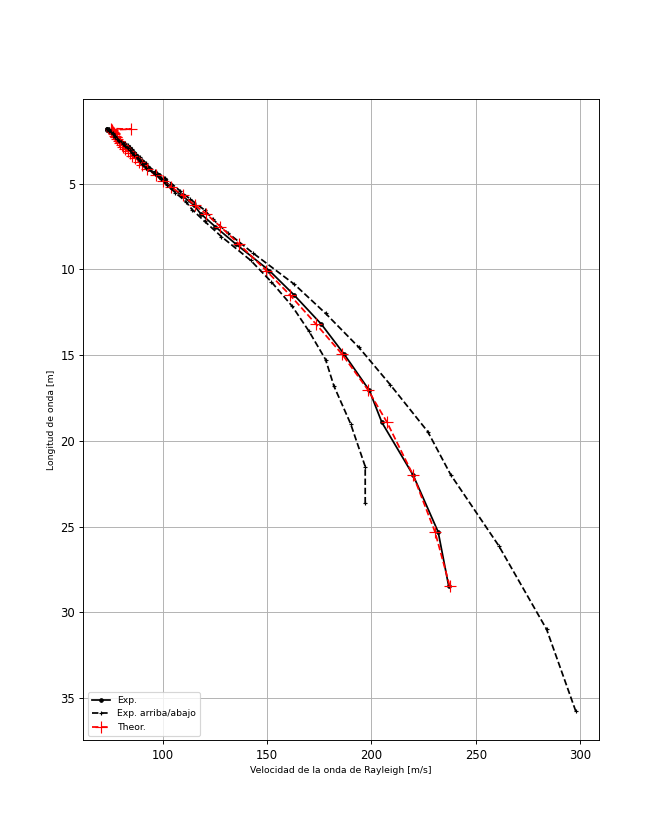

<IPython.core.display.Javascript object>


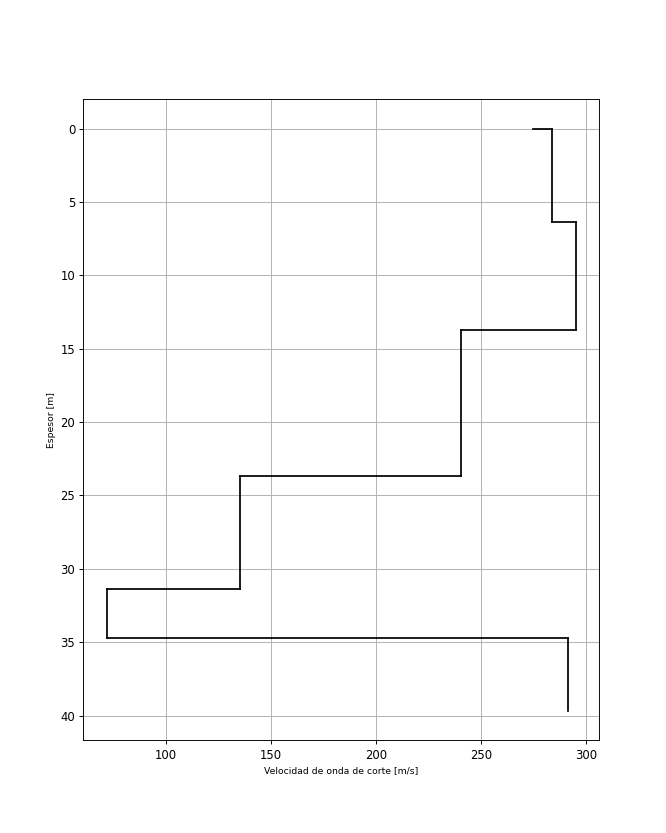

In [4]:
c_test_min = 50 #m/s
c_test_max = 500 #m/+s
delta_c_test = 0.5 #m/s
c_test = np.arange(c_test_min, c_test_max + 1, delta_c_test) #m/s
c_test = c_test[:-1]

#Parámetros de la capa
n = 6
alpha = [1440, 1440, 1440, 1440, 1440, 1440, 1440] #m/s
h = [1, 1, 2, 2, 4, 5] #m
beta = [75, 90, 150, 180, 240, 290, 290] #m/s
rho = [1850, 1850, 1850, 1850, 1850, 1850, 1850] #kg/m^3

parametros = np.concatenate((h, beta))
c_t, lambda_t = Amasw.theoretical_dispersion_curve(c_test, h, alpha, beta, rho, n)

#Visualizar la primera iteración
up_low_boundary = 'yes'
FigWidth = 8 #cm
FigHeight = 10 #cm
FigFontSize = 8 #pt
Amasw.plot_theor_exp_dispersion_curves(c_t, lambda_t, up_low_boundary, FigWidth, FigHeight, FigFontSize)

def objetivo(parametros):  # parametros = f(h, vel)
        h = parametros[0:n]
        beta = parametros[n:]
        #beta = parameters
        #alpha = np.sqrt(3)*beta
        alpha = [1440, 1440, 1440, 1440, 1440, 1440, 1440]
        #rho = (alpha + 1870)/3.05
        rho = np.array([1850, 1850, 1850, 1850, 1850, 1850, 1850])
        c_t, lambda_t = Amasw.theoretical_dispersion_curve(c_test, h, alpha, beta, rho, n) #curva teórica
        
        observados = c_curve0 #Curva observada/experimental
        teoricos = np.squeeze(c_t) #Curva teórica
        return np.sqrt(np.sum((teoricos-observados)**2/len(teoricos))) #Mínimos cuadrados

#Error inicial
error = objetivo(parametros)
print('Error inicial:', error)

#RECOCIDO SIMULADO
lw = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 50, 50, 50, 50, 50, 50, 50]#Límite inferior para h y beta
up = [10, 10, 10, 10, 10, 10, 300, 300, 300, 300, 300, 300, 300]#Límite superior para h y beta
ret = dual_annealing(objetivo, bounds = list(zip(lw, up)), maxfun=10000)
h_sol = ret.x[0:n]
beta_sol = ret.x[n:]
c_sol, lambda_sol = Amasw.theoretical_dispersion_curve(c_test, h_sol, alpha, beta_sol, rho, n)

#Visualizar los resultados
FigWidth = 8 #cm
FigHeight = 10 #cm
FigFontSize = 8 #pt
Amasw.plot_theor_exp_dispersion_curves(c_sol, lambda_sol, up_low_boundary, FigWidth, FigHeight, FigFontSize)
plt.savefig("ResultadoRecocido.png")

#Grafica el perfil de velocidades/modelo de velocidades
Amasw.modelo_de_velocidades(n, h_sol, beta_sol, FigWidth, FigHeight, FigFontSize)
plt.savefig("ModeloDeVelocidades.png")